Épisode 1 terminé - Score : 26.0, Meilleur score : 26.0
Épisode 2 terminé - Score : 13.0, Meilleur score : 26.0
Épisode 3 terminé - Score : 17.0, Meilleur score : 26.0
Épisode 4 terminé - Score : 26.0, Meilleur score : 26.0
Épisode 5 terminé - Score : 24.0, Meilleur score : 26.0
Épisode 6 terminé - Score : 43.0, Meilleur score : 43.0
Épisode 7 terminé - Score : 20.0, Meilleur score : 43.0
Épisode 8 terminé - Score : 15.0, Meilleur score : 43.0
Épisode 9 terminé - Score : 17.0, Meilleur score : 43.0
Épisode 10 terminé - Score : 50.0, Meilleur score : 50.0


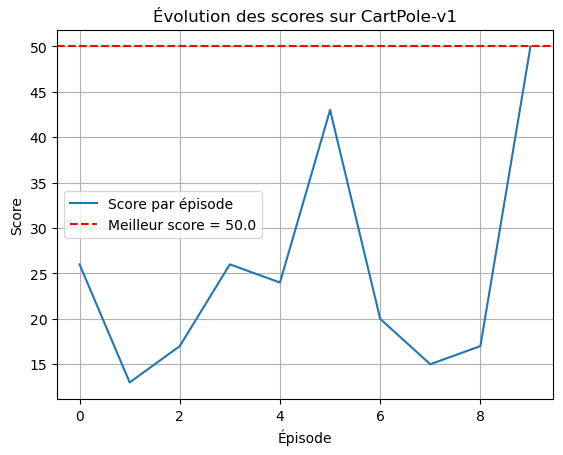

In [9]:
import gym
import time
import matplotlib.pyplot as plt

# Créer l'environnement avec affichage
env = gym.make("CartPole-v1", render_mode="human")

scores = []  # Liste pour stocker les scores de chaque épisode
best_score = 0
num_episodes = 10  # Nombre d'épisodes à jouer

for episode in range(num_episodes):
    observation, info = env.reset()
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()  # Action aléatoire
        observation, reward, terminated, truncated, info = env.step(action)

        score += reward
        done = terminated or truncated

        time.sleep(0.02)  # Pour ralentir l'affichage

    scores.append(score)
    best_score = max(best_score, score)
    print(f"Épisode {episode + 1} terminé - Score : {score}, Meilleur score : {best_score}")

env.close()

# Tracer le graphique des scores
plt.plot(scores, label="Score par épisode")
plt.axhline(y=best_score, color='r', linestyle='--', label=f"Meilleur score = {best_score}")
plt.xlabel("Épisode")
plt.ylabel("Score")
plt.title("Évolution des scores sur CartPole-v1")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import time

# Modèle DQN simple
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Hyperparamètres
episodes = 500
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
batch_size = 64
memory = deque(maxlen=10000)

# Environnement sans rendu pour l'entraînement rapide
env_train = gym.make("CartPole-v1")
env_render = gym.make("CartPole-v1", render_mode="human")

state_dim = env_train.observation_space.shape[0]
action_dim = env_train.action_space.n

model = DQN(state_dim, action_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Sélection d'action epsilon-greedy
def select_action(state, epsilon):
    if random.random() < epsilon:
        return env_train.action_space.sample()
    with torch.no_grad():
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        q_values = model(state_tensor)
        return torch.argmax(q_values).item()

# Entraînement
for episode in range(episodes):
    # Utiliser le rendu 1 fois sur 20
    env = env_render if episode % 20 == 0 else env_train
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        if episode % 20 == 0:
            env.render()
            time.sleep(0.01)

        action = select_action(state, epsilon)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        memory.append((state, action, reward, next_state, done))
        state = next_state
        total_reward += reward

        # Apprentissage si mémoire suffisante
        if len(memory) >= batch_size:
            batch = random.sample(memory, batch_size)
            states, actions, rewards, next_states, dones = zip(*batch)

            states = torch.FloatTensor(states)
            actions = torch.LongTensor(actions).unsqueeze(1)
            rewards = torch.FloatTensor(rewards).unsqueeze(1)
            next_states = torch.FloatTensor(next_states)
            dones = torch.FloatTensor(dones).unsqueeze(1)

            q_values = model(states).gather(1, actions)
            next_q = model(next_states).max(1)[0].unsqueeze(1)
            targets = rewards + gamma * next_q * (1 - dones)

            loss = criterion(q_values, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    print(f"Épisode {episode}, score = {total_reward}, epsilon = {epsilon:.3f}")

env_train.close()

# === Test final avec rendu ===
print("\n=== Test après entraînement ===")
test_env = gym.make("CartPole-v1", render_mode="human")
state, _ = test_env.reset()
done = False
total_reward = 0

while not done:
    test_env.render()
    action = select_action(state, epsilon=0.0)  # Politique 100% greedy
    state, reward, terminated, truncated, _ = test_env.step(action)
    total_reward += reward
    done = terminated or truncated
    time.sleep(0.03)

test_env.close()
print(f"Score final obtenu après entraînement : {total_reward}")


Épisode 0, score = 21.0, epsilon = 0.995
Épisode 1, score = 29.0, epsilon = 0.990
Épisode 2, score = 17.0, epsilon = 0.985
Épisode 3, score = 19.0, epsilon = 0.980
Épisode 4, score = 20.0, epsilon = 0.975
Épisode 5, score = 22.0, epsilon = 0.970
Épisode 6, score = 16.0, epsilon = 0.966
Épisode 7, score = 20.0, epsilon = 0.961
Épisode 8, score = 17.0, epsilon = 0.956
Épisode 9, score = 11.0, epsilon = 0.951
Épisode 10, score = 21.0, epsilon = 0.946
Épisode 11, score = 43.0, epsilon = 0.942
Épisode 12, score = 30.0, epsilon = 0.937
Épisode 13, score = 15.0, epsilon = 0.932
Épisode 14, score = 30.0, epsilon = 0.928
Épisode 15, score = 16.0, epsilon = 0.923
Épisode 16, score = 58.0, epsilon = 0.918
Épisode 17, score = 24.0, epsilon = 0.914
Épisode 18, score = 26.0, epsilon = 0.909
Épisode 19, score = 22.0, epsilon = 0.905
Épisode 20, score = 17.0, epsilon = 0.900
Épisode 21, score = 13.0, epsilon = 0.896
Épisode 22, score = 25.0, epsilon = 0.891
Épisode 23, score = 43.0, epsilon = 0.887
Ép

KeyboardInterrupt: 

In [ ]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque
import time
import matplotlib.pyplot as plt

# Modèle DQN simple
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# Hyperparamètres
episodes = 300
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
batch_size = 64
memory = deque(maxlen=10000)

# Environnement sans rendu pour l'entraînement rapide
env_train = gym.make("CartPole-v1")
env_render = gym.make("CartPole-v1", render_mode="human")

state_dim = env_train.observation_space.shape[0]
action_dim = env_train.action_space.n

model = DQN(state_dim, action_dim)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Sélection d'action epsilon-greedy
def select_action(state, epsilon):
    if random.random() < epsilon:
        return env_train.action_space.sample()
    with torch.no_grad():
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        q_values = model(state_tensor)
        return torch.argmax(q_values).item()

scores = []  # Liste des scores par épisode
best_score = 0

# Entraînement
for episode in range(episodes):
    env = env_render if episode % 20 == 0 else env_train
    state, _ = env.reset()
    total_reward = 0
    done = False

    while not done:
        if episode % 20 == 0:
            env.render()
            time.sleep(0.01)

        action = select_action(state, epsilon)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        memory.append((state, action, reward, next_state, done))
        state = next_state
        total_reward += reward

        if len(memory) >= batch_size:
            batch = random.sample(memory, batch_size)
            states, actions, rewards, next_states, dones = zip(*batch)

            states = torch.FloatTensor(states)
            actions = torch.LongTensor(actions).unsqueeze(1)
            rewards = torch.FloatTensor(rewards).unsqueeze(1)
            next_states = torch.FloatTensor(next_states)
            dones = torch.FloatTensor(dones).unsqueeze(1)

            q_values = model(states).gather(1, actions)
            next_q = model(next_states).max(1)[0].unsqueeze(1)
            targets = rewards + gamma * next_q * (1 - dones)

            loss = criterion(q_values, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    scores.append(total_reward)
    if total_reward > best_score:
        best_score = total_reward
    print(f"Épisode {episode+1}, score = {total_reward}, epsilon = {epsilon:.3f}, meilleur score = {best_score}")

env_train.close()

# Affichage du graphique des scores
plt.figure(figsize=(10,5))
plt.plot(scores, label="Score par épisode")
plt.axhline(y=best_score, color='r', linestyle='--', label=f"Meilleur score = {best_score}")
plt.xlabel("Épisode")
plt.ylabel("Score")
plt.title("Scores par épisode durant l'entraînement DQN sur CartPole-v1")
plt.legend()
plt.grid(True)
plt.show()

# === Test final avec rendu ===
print("\n=== Test après entraînement ===")
test_env = gym.make("CartPole-v1", render_mode="human")
state, _ = test_env.reset()
done = False
total_reward = 0

while not done:
    test_env.render()
    action = select_action(state, epsilon=0.0)  # Politique 100% greedy
    state, reward, terminated, truncated, _ = test_env.step(action)
    total_reward += reward
    done = terminated or truncated
    time.sleep(0.03)

test_env.close()
print(f"Score final obtenu après entraînement : {total_reward}")


C:\Users\PC\Anaconda New\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Épisode 1, score = 27.0, epsilon = 0.995, meilleur score = 27.0
Épisode 2, score = 17.0, epsilon = 0.990, meilleur score = 27.0
Épisode 3, score = 25.0, epsilon = 0.985, meilleur score = 27.0
Épisode 4, score = 12.0, epsilon = 0.980, meilleur score = 27.0
Épisode 5, score = 19.0, epsilon = 0.975, meilleur score = 27.0
Épisode 6, score = 22.0, epsilon = 0.970, meilleur score = 27.0
Épisode 7, score = 20.0, epsilon = 0.966, meilleur score = 27.0


C:\Users\PC\AppData\Local\Temp\ipykernel_11544\3674073140.py:81: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  states = torch.FloatTensor(states)


Épisode 8, score = 24.0, epsilon = 0.961, meilleur score = 27.0
Épisode 9, score = 10.0, epsilon = 0.956, meilleur score = 27.0
Épisode 10, score = 37.0, epsilon = 0.951, meilleur score = 37.0
Épisode 11, score = 16.0, epsilon = 0.946, meilleur score = 37.0
Épisode 12, score = 16.0, epsilon = 0.942, meilleur score = 37.0
Épisode 13, score = 17.0, epsilon = 0.937, meilleur score = 37.0
Épisode 14, score = 45.0, epsilon = 0.932, meilleur score = 45.0
Épisode 15, score = 27.0, epsilon = 0.928, meilleur score = 45.0
Épisode 16, score = 10.0, epsilon = 0.923, meilleur score = 45.0
Épisode 17, score = 31.0, epsilon = 0.918, meilleur score = 45.0
Épisode 18, score = 15.0, epsilon = 0.914, meilleur score = 45.0
Épisode 19, score = 15.0, epsilon = 0.909, meilleur score = 45.0
Épisode 20, score = 21.0, epsilon = 0.905, meilleur score = 45.0
Épisode 21, score = 15.0, epsilon = 0.900, meilleur score = 45.0
Épisode 22, score = 11.0, epsilon = 0.896, meilleur score = 45.0
Épisode 23, score = 16.0, e